# Final Project: Predict Futire Sales

## Project Members:
* Vinay Kumar Varanasi - vv54
* Yatish Chandra Emmani - ye65

This is a Kaggle competition about predicting future sales. In this project, our task is to forecast the total sales for every product and store in the next month.

We have five CSV files: test dataset file, items dataset file, shops dataset file, item_categories dataset file, and sales train dataset file. First, We will prepare the dataset and do all the cleaning and feature selection steps. Then we build and evaluate our models and try to improve them. Finally, our conclusion will depend on the model predictions and accuracies.

## **Sections:**

#### 1. Initial setup and data analysis

#### 2. Data cleaning

#### 3. Feature selection
 
#### 4. Modeling and evaluation
 
#### 5. Conclusion

## 1. Initial setup and Data Analysis

In [9]:
#Loading libraries
import pandas as pd
import datetime
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import neighbors, preprocessing, model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn import metrics
%matplotlib inline
import os
import time

In [14]:
#Creating the dataframes
items = pd.read_csv('/Users/yatis/Desktop/Data Analytics/Assignments/Kaggle Data/items.csv')
item_categories = pd.read_csv('/Users/yatis/Desktop/Data Analytics/Assignments/Kaggle Data/item_categories.csv')
shops = pd.read_csv('/Users/yatis/Desktop/Data Analytics/Assignments/Kaggle Data/shops.csv')
sales = pd.read_csv('/Users/yatis/Desktop/Data Analytics/Assignments/Kaggle Data/sales_train.csv', parse_dates=['date'])
test = pd.read_csv('/Users/yatis/Desktop/Data Analytics/Assignments/Kaggle Data/test.csv')

# Join the dataframe on a single train dataframe
train_df = sales.join(items, on='item_id', rsuffix='_').join(shops, on='shop_id', rsuffix='_').join(item_categories, on='item_category_id', rsuffix='_').drop(['item_id_', 'shop_id_', 'item_category_id_'], axis=1)
train_df.head()

C:\Users\yatis\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\yatis\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\yatis\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16.01.2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\yatis\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26.01.2013' in DD/MM/YYYY format. Provide format or specif

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


### **Overview on the Dataset**

In [15]:
#checking train dataframe
print('Shape of Train DataFrame ',train_df.shape)

Shape of Train DataFrame  (2935849, 10)


In [16]:
print('Info on Dataset')
print(train_df.info())

Info on Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   item_name           object        
 7   item_category_id    int64         
 8   shop_name           object        
 9   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 224.0+ MB
None


In [17]:
#Checking some properties of our features to choose the desirable features 
print(train_df.describe())

       date_block_num       shop_id       item_id    item_price  item_cnt_day  \
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06   
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00   
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00   
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01   
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00   
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00   
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00   
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03   

       item_category_id  
count      2.935849e+06  
mean       4.000138e+01  
std        1.710076e+01  
min        0.000000e+00  
25%        2.800000e+01  
50%        4.000000e+01  
75%        5.500000e+01  
max        8.300000e+01  


In [18]:
# Viewing the train dataframe 
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


<AxesSubplot:>

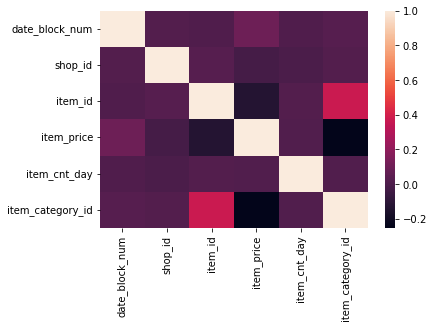

In [19]:
#Checking the correlation between features 
sns.heatmap(train_df.corr())

In [20]:
#Checking the correlation between features 
train_df.corr()['item_cnt_day'].sort_values()

shop_id            -0.005230
date_block_num      0.009402
item_price          0.011197
item_category_id    0.014768
item_id             0.016650
item_cnt_day        1.000000
Name: item_cnt_day, dtype: float64

In [21]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-03-01,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-05-01,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-06-01,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


## 2. Data Cleaning

In [22]:
#Checking missing values
print('Dataset null values:')
print(train_df.isna().any())

Dataset null values:
date                  False
date_block_num        False
shop_id               False
item_id               False
item_price            False
item_cnt_day          False
item_name             False
item_category_id      False
shop_name             False
item_category_name    False
dtype: bool


<AxesSubplot:xlabel='item_price'>

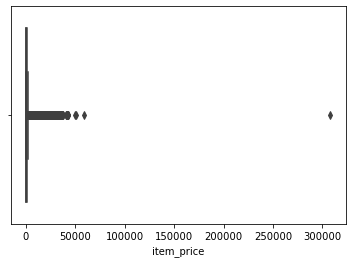

In [23]:
#Checking outliers
sns.boxplot(x=train_df["item_price"])

<AxesSubplot:xlabel='item_cnt_day'>

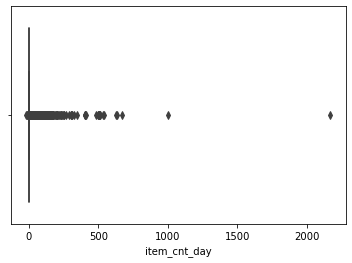

In [24]:
#Checking outliers
sns.boxplot(x=train_df["item_cnt_day"])

In [25]:
# Dropping training items with extreme or negative prices or sales counts
upper_lim = train_df["item_price"].quantile(.95)
train_df = train_df[(train_df["item_price"] > 0) & (train_df["item_price"] < upper_lim)]
train_df = train_df[(train_df["item_cnt_day"] > 0) & (train_df["item_cnt_day"] < 1000)]

## 3. Feature selection

In [26]:
# Keeping shops and items that are in the test set
train_df = train_df.loc[train_df.shop_id.isin(test["shop_id"].unique()), :]
train_df = train_df.loc[train_df.item_id.isin(test["item_id"].unique()), :]

In [27]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-02-01,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
10,2013-03-01,0,25,2574,399.0,2.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
11,2013-05-01,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
12,2013-07-01,0,25,2574,399.0,1.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
13,2013-08-01,0,25,2574,399.0,2.0,DEL REY LANA Born To Die The Paradise Editio...,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства


In [28]:
#Grouping our dataset by date_block_num, shop_id, and item_id. So, we can predict the sales for every unique product and shop.

train = train_df[["date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day", "shop_name", "item_name"]].groupby(
    ["date_block_num", "shop_id", "item_id"]).agg(
    {"item_cnt_day": "sum"}).reset_index()
train.rename(columns={"item_cnt_day": "item_cnt_month"}, inplace=True)

In [29]:
train.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,2,33,1.0
1,0,2,491,1.0
2,0,2,1007,3.0
3,0,2,1010,1.0
4,0,2,1023,2.0


## 4. Modelling and evaluation

### Applying KNN Regression

In [30]:
#prepare the dataset
X = train.drop(['item_cnt_month'], axis =1 )
Y = train['item_cnt_month']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1 )

In [31]:
#build the model
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [32]:
accuracy = knn.score(X_test, Y_test)
accuracy

0.5717116736246896

In [33]:
y_pred=knn.predict(X_test)

confusion_matrix(Y_test, y_pred) 

array([[60645,  5848,  1167, ...,     0,     0,     0],
       [16284,  3136,   888, ...,     0,     0,     0],
       [ 5527,  1760,   643, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=int64)

In [34]:
print("Test set score: {:.2f}".format(np.mean(y_pred == Y_test)))

print(accuracy_score(Y_test, y_pred))

Test set score: 0.57
0.5717116736246896


## Trying some model evaluation techniques to imporve our model
### cross validation settings

In [35]:
#generate the same set of random numbers
seed = 1
kfold = model_selection.KFold(n_splits=10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

Evaluate a KNN model using cross validation

In [36]:
model = neighbors.KNeighborsClassifier()
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print('Accuracy -val set: %.2f%% (%.2f)' % (results.mean()*100, results.std()))
results

Accuracy -val set: 57.13% (0.04)


array([0.55583153, 0.52882735, 0.52164033, 0.56470961, 0.56472723,
       0.5411228 , 0.57341155, 0.60702144, 0.62632775, 0.62977382])

Evaluate a KNN model using holdout

In [37]:
test_size = 0.33 # try different test size and seed
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 57.34%


Applying RandomForestRegressor model

In [38]:
# Split the dataset
X = train.drop(['item_cnt_month'], axis =1 )
Y = train['item_cnt_month']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25 )

In [39]:
#build our model 
model=RandomForestRegressor()
model.fit(X_train,Y_train)

print('RandomForestRegressor model score is:',model.score(X_train,Y_train))
print('MSE: ',mean_squared_error(Y_train,model.predict(X_train)))
model.predict(X_test)

RandomForestRegressor model score is: 0.968730883550505
MSE:  3.9331349526919466


array([1.56, 4.04, 3.2 , ..., 2.15, 2.39, 2.26])

### Trying to improve the model by normalizing our dataset

In [40]:
# normalizing our dataset
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# call the min_max_scaling function
x = train.drop(['item_cnt_month'], axis=1)
df_normalized = min_max_scaling(x)

df_normalized.head()

,date_block_num,shop_id,item_id
0,0.0,0.0,0.000136
1,0.0,0.0,0.020825
2,0.0,0.0,0.044134
3,0.0,0.0,0.044270
4,0.0,0.0,0.044857


In [41]:
#split the dataset after normalizatio
X = df_normalized
Y = train['item_cnt_month']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25 )

In [42]:
#trying the KNN model 

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [43]:
accuracy = knn.score(X_test, Y_test)
accuracy

0.5653613768077648

In [44]:
y_pred = knn.predict(X_test)
accuracy_score(Y_test, y_pred)

0.5653613768077648

In [45]:
#trying the Random forest regressor

model=RandomForestRegressor()
model.fit(X_train,Y_train)

print('RandomForestRegressor model score is:',model.score(X_train,Y_train))
print('MSE: ',mean_squared_error(Y_train,model.predict(X_train)))
model.predict(X_test)

RandomForestRegressor model score is: 0.9678637941912368
MSE:  4.0422003774075135


array([1.7 , 3.16, 3.37, ..., 2.74, 2.17, 1.73])

## 5. Conclusion
In conclusion, we can see that the Random forest regressor model predicts the total amount of sales with accuracy= 0.97 after improving the result. On the other hand, KNN did not give us a good accuracy or RSE.